# Определение перспективного тарифа для телеком компании

В данной работе нам необходимо исследовать данные по тарифным планам оператора сотовой связи. 
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра», нужно определить, какой из тарифов приносит больше денег компании.
Мы проведем предварительный анализ тарифов на небольшой выборке клиентов. В выборке сохранены данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.Мы проанализируем поведение клиентов и сделаем вывод — какой тариф лучше.


#### Описание тарифов оператора связи####
<b>Тариф «Смарт»</b>
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 

<p>
минута разговора: 3 рубля, 
сообщение: 3 рубля, 
1 Гб интернет-трафика: 200 рублей, 
<p>

<b>Тариф «Ультра»</b>
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    
<p>    
минута разговора: 1 рубль, 
сообщение: 1 рубль, 
1 Гб интернет-трафика: 150 рублей
    
<p>
<b>Особенность:</b>     
«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.   
    


#### План работы:

1. Откроем датасеты и проверим, что за данные перед нами
2. Проведем предобработку данных: приведем имена столбцов к единому формату, заполним или удалим пропуски и проверим данные на дубликаты
3. Проведем исследовательский анализ данных
4. Сформируем гипотезы и проверим их реалистичность
5. Сделаем выводы

### Оглавление <a id="toc"></a>

* [Шаг 1. Изучение общей информации](#step_1)
 * [Таблица №1 - calls (информация о звонках)](#step_1_1)
 * [Таблица №2 - internet (информация об интернет-сессиях)](#step_1_2)
 * [Таблица №3 - messages (информация о сообщениях)](#step_1_3)
 * [Таблица №4  - tariffs (информация о тарифах)](#step_1_4)
 * [Таблица №5  - users (информация о пользователях)](#step_1_5)
* [Шаг 1. Вывод](#step_11)
* [Шаг 2. Предобработка и изучение данных. Расчеты для каждого пользователя](#step_2)
 * [2.1. Количество сделанных звонков и израсходованных минут разговора по месяцам](#step_2.1)
 * [2.2. Количество отправленных сообщений по месяцам](#step_2.2)
 * [2.3. Объем израсходованного интернет-трафика по месяцам](#step_2.3)
 * [2.4. Выручка с каждого пользователя  по месяцам](#step_2.4)
* [Шаг 2. Вывод](#step_22)
* [Шаг 3. Исследование данных](#step_3)
 * [3.1 Исследование длительности разговора](#step_3.1)
  * [3.1.1 Средняя длительность разговора в зависимости от вида тарифа](#step_3.1.1)
  * [3.1.2 Стандартное отклонение длительности разговора](#step_3.1.2)
  * [3.1.3 Дисперсия длительности звонков](#step_3.1.3)
 * [3.2 Анализ количества сообщений](#step_3.2)
  * [3.2.1  Среднее количество сообщений по тарифам](#step_3.2.1)
  * [3.2.2  Стандартное отклонение количества сообщений по тарифам](#step_3.2.2)
  * [3.2.3  Анализ дисперсии количества сообщений по тарифам](#step_3.2.3)
  * [3.3 Анализ интернет-траффика](#step_3.3)
  * [3.3.1  Среднее количество интернет-траффика](#step_3.3.1)
  * [3.3.2  Стандартное отклонение объема интернет-траффика](#step_3.3.2)
  * [3.3.3  Анализ дисперсии объема интернет-траффика](#step_3.3.3)
* [Шаг4. Исследование выручки. Проверка гипотез](#step_4)
 * [4.1 Исследование выручки](#step_4.1)
 * [4.2 Проверка гипотез](#step_4.2)
  
 
 
 
 
 
 
 
 

### [Шаг 1. Изучение общей информации]<a id="step_1"></a>

[в начало](#toc)

Импортируем все необходимые нам библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np

Откроем наши датасеты и посмотрим на данные

### [Таблица №1 - calls (информация о звонках)]<a id="step_1_1"></a>

[в начало](#toc)

In [2]:
calls = pd.read_csv("/datasets/calls.csv")
display(calls.head())
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица <b> calls </b> состоит из 202607строк и 4х столбцов
В ней мы видим следующие наименования столбцов:
1. id — уникальный номер звонка
2. call_date — дата звонка
3. duration — длительность звонка в минутах
4. user_id — идентификатор пользователя, сделавшего звонок

Названия столбцов нас вполне устраивают.
Посмотрим данные чуть подробнее.

Переведем сразу столбец с датами в нужный нам формат даты

In [3]:
#меняем тип данных
calls.call_date = pd.to_datetime(calls.call_date)

#добавим столбец с месяцем
calls['month'] = calls.call_date.dt.month

#проверим
calls.info()
display(calls.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Все в порядке, формат даты изменили на корректный. Теперь проверим пропуски.

In [4]:
#проверим на пропуски и дубликаты
calls.isnull().sum() 
#calls.duplicated().sum()

id           0
call_date    0
duration     0
user_id      0
month        0
dtype: int64

Пропусков и дубликатов нет, и это прекрасно. Проверим описание таблицы.

In [5]:
#посмотрим описание таблицы
calls.describe()

,duration,user_id,month
count,202607.000000,202607.000000,202607.000000
mean,6.755887,1253.940619,8.574067
std,5.843365,144.722751,2.787093
min,0.000000,1000.000000,1.000000
25%,1.300000,1126.000000,7.000000
50%,6.000000,1260.000000,9.000000
75%,10.700000,1379.000000,11.000000
max,38.000000,1499.000000,12.000000


В данном случае, здесь информативны данные только по столбцу duration.
Мы можем видеть минимальую, максимальную и среднюю продолжительность звонков. Медиана и средняя не слишком отличаются, а значит можно предполжить, что вбросов по продолжительности звонков нет. 

Посморим на гистограмму длительности звонков

Text(0, 0.5, 'Частотность')

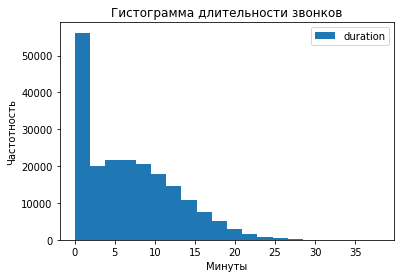

In [6]:
calls.plot(kind = 'hist', y = 'duration', bins = 20, title = 'Гистограмма длительности звонков')
plt.xlabel('Минуты')
plt.ylabel('Частотность')

На гистограмме мы видим большое количество звоноков длительностью в 0 минут - скорее всего, это звонки, которые начались, но по какой-то технической причине связь оборвалась. 

In [7]:
#посчитаем количество нулевых значений
calls['duration'].value_counts().sort_index()[0]

39613

Поскольку таких звонков большое количество и мы  знаем, что сотовый оператор взимает оплату за свои услуги поминутно, то округлим значение 0 до 1 минуты. 

In [8]:
#заменяем нулевые значения на 1
calls.loc[calls['duration'] == 0, 'duration'] = 1

Округлим так же остальные значения до минут

In [9]:
#округляем остальные данные до минут
calls['duration'] = np.ceil(calls['duration'])
#поменяем сразу тип данных на int
calls['duration'] = calls['duration'].astype('int')
calls.info()
display(calls.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


По данному столбцу мы убедились, что пропусков нет, поменяли формат даты зввонка на datetime64, округлили данные по длительности звонка до минут и изменили формат данных столбца duration на целочисленный int64.

### [Таблица №2 - internet (информация об интернет-сессиях)]<a id="step_1_2"></a>

[в начало](#toc)

In [10]:
internet = pd.read_csv("/datasets/internet.csv")
display(internet.head())
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица <b> internet </b> состоит из 149396 строк и 5 столбцов
В ней мы видим следующие наименования столбцов:
1. id — уникальный номер сессии
2. mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
3. session_date — дата интернет-сессии
4. user_id — идентификатор пользователя

Плюс есть еще один пустой столбец.

Сформулируем, что нам нужно сделать:
1. Удалим пустой столбец
2. Переименуем столбец id в более понятное название.
3. Нам известно, что сотовый оператор округляет данные всегда до целых мегабайтов в своих тарифах. Поэтому округлим эти данные в столбце mb_used.
4. Переведем данные в столбце mb_used в целочисленный тип
5. Переведем данные в столбце с датой в datetime
6. Проверим на пропуски

In [11]:
#удалим пустой столбец
internet.drop(columns=['Unnamed: 0'], inplace=True)

#переименуем столбец id:
internet.columns = ['session_id', 'mb_used', 'session_date', 'user_id']

In [12]:
#округлим данные
internet['mb_used'] = np.ceil(internet['mb_used'])

#поменяем сразу тип данных на int
internet['mb_used'] = internet['mb_used'].astype('int')

#поменяем тип данных на datetime
internet.session_date = pd.to_datetime(internet.session_date)

#добавим столбец с месяцем
internet['month'] = internet.session_date.dt.month

#проверим
internet.info()
display(internet.head(5))

#пропуски
internet.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
session_id      149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


,session_id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


session_id      0
mb_used         0
session_date    0
user_id         0
month           0
dtype: int64

In [13]:
internet.duplicated().sum()

0

Все в порядке, пропусков и дубликатов так же нет. Посмотрим так же описание таблицы.

In [14]:
#посмотрим описание таблицы
internet.describe()

,mb_used,user_id,month
count,149396.000000,149396.000000,149396.000000
mean,370.622098,1252.099842,8.563315
std,278.387019,144.050823,2.788717
min,0.000000,1000.000000,1.000000
25%,139.000000,1130.000000,7.000000
50%,349.000000,1251.000000,9.000000
75%,560.000000,1380.000000,11.000000
max,1725.000000,1499.000000,12.000000


Посмотрим на данные в столбце mb_used.
Мы можем видеть минимальный, максимальный и средний объем траффика. Медиана и средняя так же не слишком отличаются, а значит можно предполжить, что существенных вбросов по траффику тоже нет.

### [Таблица №3 - messages (информация о сообщениях)]<a id="step_1_3"></a>

[в начало](#toc)

Откроем третью таблицу

In [15]:
messages = pd.read_csv("/datasets/messages.csv")
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица <b> messages </b> состоит из 123036 строк и 3х столбцов
В ней мы видим следующие наименования столбцов:
1. id — уникальный номер сообщения
2. message_date — дата сообщения
3. user_id — идентификатор пользователя, отправившего сообщение

Сформулируем, что нам нужно сделать по таблице messages:
1. Переименуем столбец id в более понятное название.
2. Переведем данные в столбце с датой в datetime
3. Проверим на пропуски
4. Посмотрим описание таблицы

In [16]:
#переименуем столбец id:
messages.columns = ['message_id', 'message_date', 'user_id']

#поменяем тип данных на datetime
messages.message_date = pd.to_datetime(messages.message_date)

#добавим столбец с месяцем
messages['month'] = messages.message_date.dt.month

#проверим
messages.info()
display(messages.head(5))

#пропуски
messages.isnull().sum()

#посмотрим описание таблицы
messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
message_id      123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


,message_id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,user_id,month
count,123036.000000,123036.000000
mean,1256.989410,8.632262
std,143.523967,2.747328
min,1000.000000,1.000000
25%,1134.000000,7.000000
50%,1271.000000,9.000000
75%,1381.000000,11.000000
max,1499.000000,12.000000


In [17]:
messages.duplicated().sum()

0

Пропуски и дубликаты отсутствуют

### [Таблица №4  - tariffs (информация о тарифах)]<a id="step_1_4"></a>

[в начало](#toc)

In [18]:
tariffs = pd.read_csv("/datasets/tariffs.csv")
display(tariffs.head())
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Наименования столбцов:

1. tariff_name — название тарифа
2. rub_monthly_fee — ежемесячная абонентская плата в рублях
3. minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
4. messages_included — количество сообщений в месяц, включённых в абонентскую плату
5. mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
6. rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
7. rub_per_message — стоимость отправки сообщения сверх тарифного пакета
8. rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


Заменим название столбца traiff_name на tariff

In [19]:
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']

In [20]:
display(tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### [Таблица №5  - users (информация о пользователях)]<a id="step_1_5"></a>

[в начало](#toc)

In [21]:
users = pd.read_csv("/datasets/users.csv")
display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица состоит из 500 строк и 8 столбцов.
Наименования столбцов:

1. user_id — уникальный идентификатор пользователя
2. first_name — имя пользователя
3. last_name — фамилия пользователя
4. age — возраст пользователя (годы)
5. reg_date — дата подключения тарифа (день, месяц, год)
6. churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
7. city — город проживания пользователя
8. tariff — название тарифного плана

Мы видим очень много пропусков в столбце churn_date, это означает, что большинство клиентов пользуются тарифом до сих пор.

In [22]:
users.duplicated().sum()

0

Заменим тип данных

In [23]:
users.churn_date = pd.to_datetime(users.churn_date)
users.reg_date = pd.to_datetime(users.reg_date)

Добавим столбцы с месяцами начала и с месяцами окончания пользования тарифом

In [24]:
#добавляем столбцы с месяцами
users['reg_date'] = pd.DatetimeIndex(users['reg_date']).month
users['churn_date'] = pd.DatetimeIndex(users['churn_date']).month

In [25]:
#рассчитаем длительность пользования тарифом
users['day_duration_of_use'] = users['churn_date'] - users['reg_date']
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,day_duration_of_use
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,NaN
1,1001,41,NaN,Москва,Иван,Ежов,11,smart,NaN
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,6,smart,NaN
3,1003,23,NaN,Москва,Белла,Белякова,8,ultra,NaN
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,5,ultra,NaN


In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
user_id                500 non-null int64
age                    500 non-null int64
churn_date             38 non-null float64
city                   500 non-null object
first_name             500 non-null object
last_name              500 non-null object
reg_date               500 non-null int64
tariff                 500 non-null object
day_duration_of_use    38 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


### [Шаг 1. Вывод]<a id="step_11"></a>

[в начало](#toc)

Мы рассмотрели 5 таблиц от 500 до 202607 строк, в которых содержится информация о пользователях сотового оператора. Мы проверили таблицы на пропуски и дубликаты, переименовали неудобные, похожие друг на друга названия столбцов, чтобы далее при исследовании данных не запутаться. Так же мы изменили формат данных, там, где это требовалось.

### [Шаг 2. Предобработка и изучение данных. Расчеты для каждого пользователя]<a id="step_2"></a>

Проведем расчеты для каждого пользователя

### [2.1. Количество сделанных звонков и израсходованных минут разговора по месяцам]<a id="step_2.1"></a>

[в начало](#toc)

Сгруппируем данные.

In [27]:
#cгруппируем данные по пользователям и месяцам, посчитав при этом по столбцу duration количество звонков и сумму минут 
#поскольку далее нам нужно будет объединять несколько сгруппированных таблиц, то сразу удалили индекс - .reset_index()

calls_group = calls.groupby(['user_id','month']).agg({'duration': ['count', 'sum']}).reset_index()
calls_group.columns = ['user_id', 'month', 'calls_count', 'calls_duration']
display(calls_group.head())

,user_id,month,calls_count,calls_duration
0,1000,5,22,164
1,1000,6,43,187
2,1000,7,47,346
3,1000,8,52,418
4,1000,9,58,478


У нас слишком много user_id (500 пользователей), чтобы сделать наглядный график с разбивкой для каждого пользователя по месяцам. Поэтому сделаем сводную таблицу для более наглядного результата общей длительности звонков по месяцам

In [28]:
calls_pivot = calls.pivot_table(index = 'month', values = 'duration', aggfunc = 'sum')
calls_pivot.columns = ['calls_duration']
display(calls_pivot)

,calls_duration
month,
1,11096
2,25078
3,49455
4,68078
5,91341
6,108063
7,135264
8,157929
9,178090


Построим график

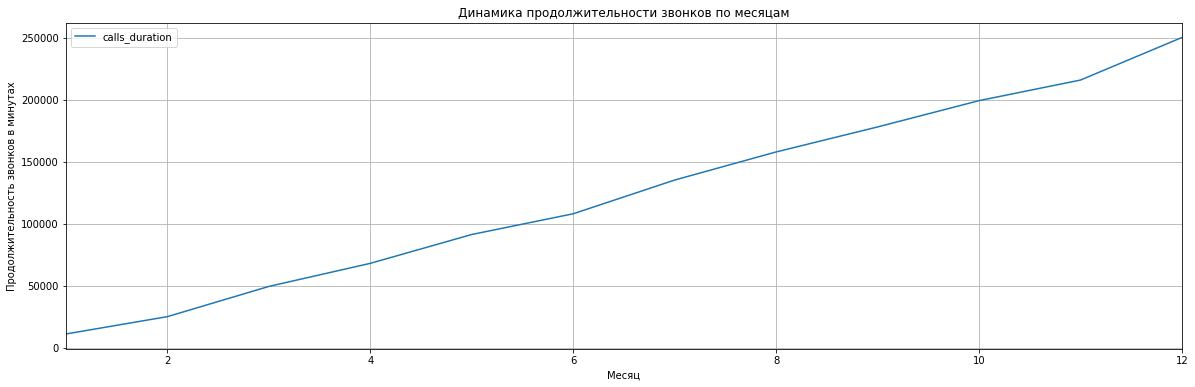

In [29]:
calls_pivot.plot(y = 'calls_duration', grid = True, figsize = (20,6), title = 'Динамика продолжительности звонков по месяцам')
plt.xlabel("Месяц")
plt.ylabel("Продолжительность звонков в минутах")
plt.show()

Из графика мы видим, что продолжительность звонков увеличивалось линейно по месяцам. Через 12 месяцев продолжительность звонка увеличилась более,чем в 22 раза.
Проанализируем количество звонков.

In [30]:
calls_pivot_count = calls.pivot_table(index = 'month', values = 'duration', aggfunc = 'count')
calls_pivot_count.columns = ['calls_count']
display(calls_pivot_count)

,calls_count
month,
1,1476
2,3328
3,6687
4,9272
5,12647
6,14716
7,18298
8,21488
9,24061


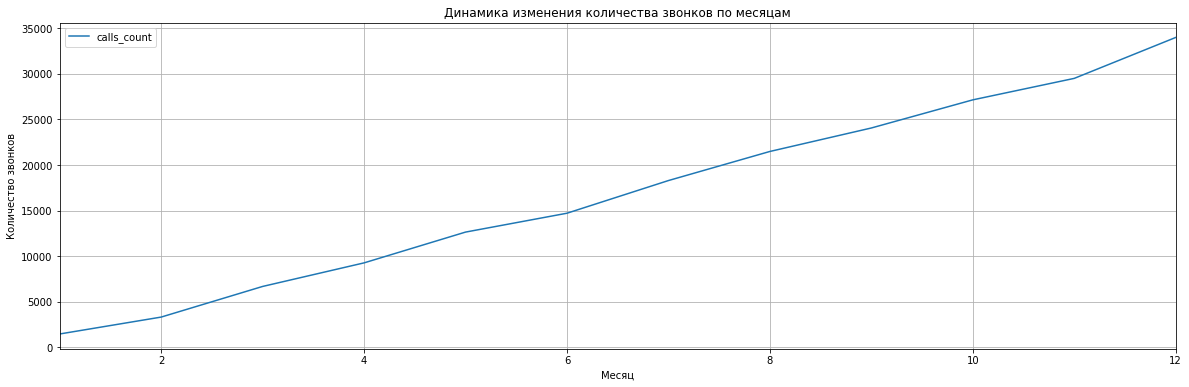

In [31]:
calls_pivot_count.plot(y = 'calls_count', grid = True, figsize = (20,6), title = 'Динамика изменения количества звонков по месяцам')
plt.xlabel("Месяц")
plt.ylabel("Количество звонков")
plt.show()

Здесь тоже самое, мы видим, что количество звонков выросло за 12 месяцев очень существенно - в 23,5 раза.

### [2.2 Количество отправленных сообщений по месяцам]<a id="step_2.2">

[в начало](#toc)

Сгруппируем данные, чтобы увидеть количество сообщений для каждого пользователя по месяцам

In [32]:
#группируем данные
messages_group = messages.groupby(['user_id','month']).agg({'message_date':'count'}).reset_index()
messages_group.columns = ['user_id', 'month', 'message_count']

#проверяем
display(messages_group.head(10))

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


Поскольку пользователей слишком много и график сообщений по месяцам для каждого пользователя не будет информативным, построим для наглядности график сообщениям всех клиентов по месяцам

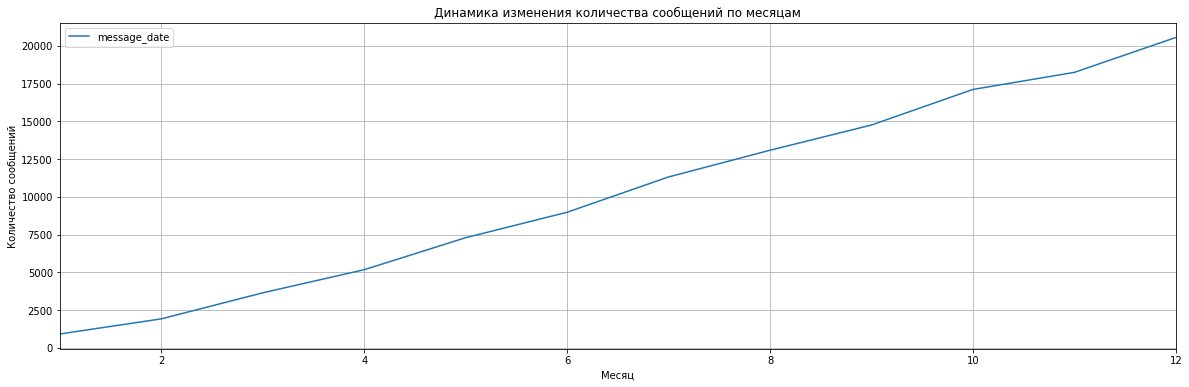

In [33]:
messages_pivot = messages.pivot_table(index = 'month', values = 'message_date', aggfunc = 'count')
messages_pivot.plot(y = 'message_date', grid = True, figsize = (20,6), 
                    title = 'Динамика изменения количества сообщений по месяцам')
plt.xlabel("Месяц")
plt.ylabel("Количество сообщений")
plt.show()
#display(messages_pivot)

Количество сообщений так же выросло линейно

### [2.3. Объем израсходованного интернет-трафика по месяцам]<a id="step_2.3">

[в начало](#toc)

Посчитаем объем израсходованного трафимка по месяцам для каждого пользователя

In [34]:
#делаем сводную таблицу интернет траффика для каждого пользователя по месяцам
internet_group = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet_group.columns = ['user_id', 'month', 'mb_used_sum']
display(internet_group.head())

,user_id,month,mb_used_sum
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


Построим график по объему сообщений

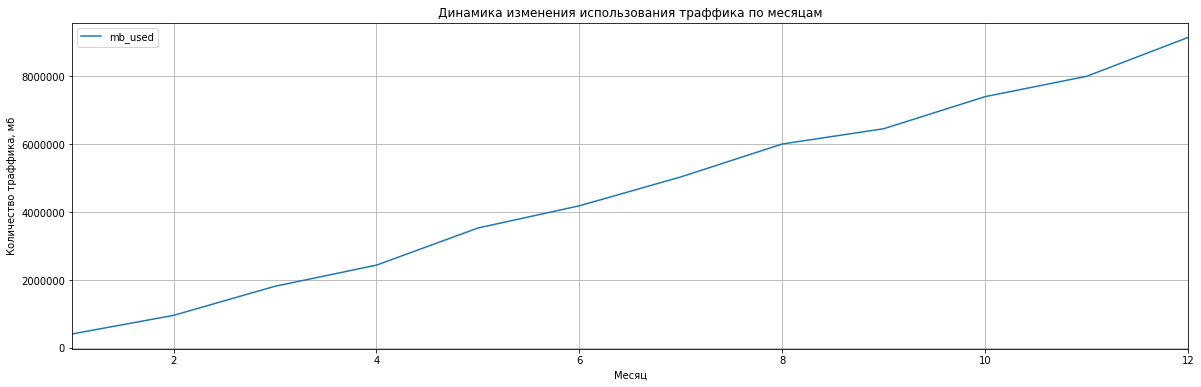

,mb_used
month,
1,408213
2,956348
3,1813960
4,2436111
5,3529893
6,4184770
7,5035299
8,6005126
9,6454931


In [35]:
internet_pivot = internet.pivot_table(index = 'month', values = 'mb_used', aggfunc = 'sum')
internet_pivot.plot(y = 'mb_used', grid = True, figsize = (20,6), 
                    title = 'Динамика изменения использования траффика по месяцам')
plt.xlabel("Месяц")
plt.ylabel("Количество траффика, мб")
plt.show()
display(internet_pivot)

Количество траффика так же выросло

### [2.4. Выручка с каждого пользователя  по месяцам]<a id="step_2.4"></a>

[в начало](#toc)

Чтобы посчитать выручку, нам необходимо объединить несколько таблиц

In [36]:
#объединяем нужные таблицы по столбцу 'user_id' и 'month'
all_grouped = internet_group.merge(messages_group,  how = 'outer', on = ['user_id', 'month']).merge(calls_group,  how = 'outer', on = ['user_id', 'month']).merge(users[['user_id', 'reg_date', 'churn_date','city', 'tariff']], how = 'left', on = 'user_id')

#присваиваем имена столбцам
all_grouped.columns = ['user_id', 'month', 'mb_used', 'messages', 'calls_count','calls_duration', 'reg_date', 'churn_date', 'city','tariff']
#display(all_grouped.head(10))
 
def monthly_fee(row):
    if row['tariff'] == 'smart':
        return '550'
    else:
        return '1950'

all_grouped['monthly_fee'] = all_grouped.apply(monthly_fee, axis = 1)
display(all_grouped.head(5))


,user_id,month,mb_used,messages,calls_count,calls_duration,reg_date,churn_date,city,tariff,monthly_fee
0,1000,5,2256.0,22.0,22.0,164.0,5,NaN,Краснодар,ultra,1950
1,1000,6,23257.0,60.0,43.0,187.0,5,NaN,Краснодар,ultra,1950
2,1000,7,14016.0,75.0,47.0,346.0,5,NaN,Краснодар,ultra,1950
3,1000,8,14070.0,81.0,52.0,418.0,5,NaN,Краснодар,ultra,1950
4,1000,9,14581.0,57.0,58.0,478.0,5,NaN,Краснодар,ultra,1950


In [37]:
display(calls.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Посчитаем выручку для каждого пользователя по месяцам

In [38]:
#напишем функцию по подсчету стоимости тарифа + стоимость превышения лимита по тарифу

def additional_payment(row):
    if row['tariff'] == 'smart':
        if row['messages'] > 50:
            messages_extra = (row['messages'] - 50)*3
        else:
            messages_extra = 0
        if row['calls_duration'] > 500:
            calls_extra = (row['calls_duration'] - 500)*3
        else:
            calls_extra = 0
        if row['mb_used'] > (15*1024):
            mb_extra = (row['mb_used'] - (15*1024))*200/1024
        else:
            mb_extra = 0
            
        total_cost = messages_extra + calls_extra + mb_extra + 550
        
    if row['tariff'] == 'ultra':
        if row['messages'] > 1000:
            messages_extra = (row['messages'] - 1000)*1
        else:
            messages_extra = 0
        if row['calls_duration'] > 3900:
            calls_extra = (row['calls_duration'] - 3000)*1
        else:
            calls_extra = 0
        if row['mb_used'] > (30*1024):
            mb_extra = (row['mb_used'] - (30*1024))*150/1024
        else:
            mb_extra = 0
        total_cost = messages_extra + calls_extra + mb_extra + 1950
    return total_cost

all_grouped['total_cost'] = all_grouped.apply(additional_payment, axis=1)

In [39]:
display(all_grouped.sort_values(by = 'total_cost', ascending = False).head(5))

,user_id,month,mb_used,messages,calls_count,calls_duration,reg_date,churn_date,city,tariff,monthly_fee,total_cost
3130,1486,12,38610.0,83.0,133.0,1025.0,10,NaN,Нижний Новгород,smart,550,6765.015625
1647,1261,12,32697.0,22.0,141.0,1102.0,10,NaN,Казань,smart,550,5742.132812
260,1042,12,37219.0,75.0,121.0,755.0,11,NaN,Хабаровск,smart,550,5659.335938
3129,1486,11,36319.0,96.0,108.0,788.0,10,NaN,Нижний Новгород,smart,550,5645.554688
1810,1286,12,35151.0,68.0,95.0,751.0,11,NaN,Москва,smart,550,5222.429688


Мы получили данныен по каждому пользователю по месяцам.
Мы видим, что пользователи приобретали тариф в разные месяцы и разные даты, но поскольку, закончили пользоваться тарифом всего 38 человек из 500 (это немного, всего 7,6%), будем условно считать, что каждый месяц оплата вносилась за календарный месяц.

Посмотрим на общую выручку по месяцам

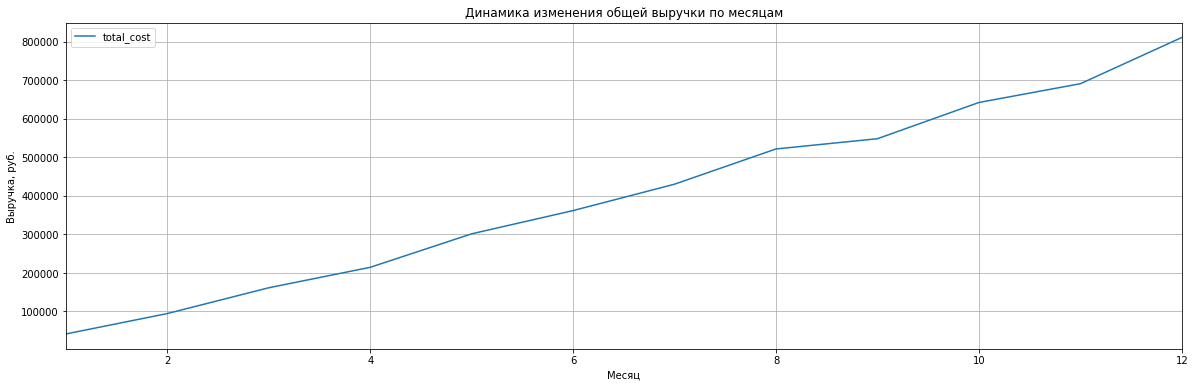

In [40]:
all_grouped_pivot = all_grouped.pivot_table(index = 'month', values = 'total_cost', aggfunc = 'sum')
all_grouped_pivot.plot(y = 'total_cost', grid = True, figsize = (20,6), 
                    title = 'Динамика изменения общей выручки по месяцам')
plt.xlabel("Месяц")
plt.ylabel("Выручка, руб.")
plt.show()

Выручка растет линейно. Как и объем траффика, длительность звонков и количество сообщений. Все гармонично.

### [Шаг 2. Вывод]<a id="step_22"></a>

[в начало](#toc)

В данном разделе мы подробно рассмотрели представленные нам данные. 
1. Поскольку тип данных мы изменили сразу, в первом шаге, то в этом разделе нам не пришлось ничего менять. 
2. Так же по данным мы видим некоторые особенности. 
 - в столбце 'duration' много звонков с нулевой длительностью. Мы предположили, что это звонки, которые сорвались по техническим причинам и округлили их до минуты
 - в столбце 'churn_date' мы видим много пустых значений, означающих, что пользователь все еще использует свой тариф. Здесь мы ничего не меняли, кроме типа данных, поскольку видим, что отказавшися от услуг сотового опреатора всего 38 человек из 500, это немного, примерно 7,6%.
3. Рассчитали объем услуг для каждого пользователя: количество и продолжительность звонков, объем интернет-траффика и количество сообщений. Так же расчитали выручку. На графиках мы видим, что у компании гармонично растут и объемы предоставляемых услуг, и объем выручки.

### [Шаг 3. Исследование данных]<a id="step_3"></a>

[в начало](#toc)

<b>Задача:</b> изучить поведение клиентов оператора, исходя из выборки. Исследовать,сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитать среднее количество, дисперсию и стандартное отклонение.

Посчитаем дисперсию, стандартное отклонение и математическое ожидание для наших данных <b> по длительности звонков</b>

In [41]:
#сделаем срез данных
smart_query = all_grouped.query('tariff == "smart"')
ultra_query = all_grouped.query('tariff == "ultra"')

#Посчитаем для тарифа Smart:

#среднее
mean_smart = smart_query['calls_duration'].mean().round(0)
#стандартное отклонение
std_smart = np.std(smart_query['calls_duration'], ddof=1).round(0)
#дисперсию
variance_smart = np.var(smart_query['calls_duration'], ddof=1).round(0)

# Посчитаем для тарифа Ultra

#среднее
mean_ultra = ultra_query['calls_duration'].mean().round(0)
#стандартное отклонение
std_ultra = np.std(ultra_query['calls_duration'], ddof=1).round(0)
#дисперсию
variance_ultra = np.var(ultra_query['calls_duration'], ddof=1).round(0)

print('Среднее по тарифу Smart:',mean_smart)
print('Дисперсия по тарифу Smart:', variance_smart)
print('Стандартное отклонение по тарифу Smart:', std_smart)
print()
print('Среднее по тарифу Ultra:', mean_ultra)
print('Дисперсия по тарифу Ultra:', variance_ultra)
print('Стандартное отклонение по тарифу Ultra:', std_ultra)

Среднее по тарифу Smart: 431.0
Дисперсия по тарифу Smart: 37578.0
Стандартное отклонение по тарифу Smart: 194.0

Среднее по тарифу Ultra: 560.0
Дисперсия по тарифу Ultra: 99063.0
Стандартное отклонение по тарифу Ultra: 315.0


Посчитаем тоже самое для <b> количества сообщений </b>

In [42]:
#Посчитаем для тарифа Smart:

#среднее
mean_smart_messages = smart_query['messages'].mean().round(0)
#стандартное отклонение
std_smart_messages = np.std(smart_query['messages'], ddof=1).round(0)
#дисперсию
variance_smart_messages = np.var(smart_query['messages'], ddof=1).round(0)

# Посчитаем для тарифа Ultra

#среднее
mean_ultra_messages = ultra_query['messages'].mean().round(0)
#стандартное отклонение
std_ultra_messages = np.std(ultra_query['messages'], ddof=1).round(0)
#дисперсию
variance_ultra_messages = np.var(ultra_query['messages'], ddof=1).round(0)

print('По количеству сообщений:')
print('Среднее по тарифу Smart:',mean_smart_messages)
print('Дисперсия по тарифу Smart:', variance_smart_messages)
print('Стандартное отклонение по тарифу Smart:', std_smart_messages)
print()
print('Среднее по тарифу Ultra:', mean_ultra_messages)
print('Дисперсия по тарифу Ultra:', variance_ultra_messages)
print('Стандартное отклонение по тарифу Ultra:', std_ultra_messages)

По количеству сообщений:
Среднее по тарифу Smart: 39.0
Дисперсия по тарифу Smart: 718.0
Стандартное отклонение по тарифу Smart: 27.0

Среднее по тарифу Ultra: 61.0
Дисперсия по тарифу Ultra: 2110.0
Стандартное отклонение по тарифу Ultra: 46.0


Для <b>интернет-траффика</b>

In [43]:
#Посчитаем для тарифа Smart:

#среднее
mean_smart_internet = smart_query['mb_used'].mean().round(0)
#стандартное отклонение
std_smart_internet = np.std(smart_query['mb_used'], ddof=1).round(0)
#дисперсию
variance_smart_internet = np.var(smart_query['mb_used'], ddof=1).round(0)

# Посчитаем для тарифа Ultra

#среднее
mean_ultra_internet = ultra_query['mb_used'].mean().round(0)
#стандартное отклонение
std_ultra_internet = np.std(ultra_query['mb_used'], ddof=1).round(0)
#дисперсию
variance_ultra_internet = np.var(ultra_query['mb_used'], ddof=1).round(0)

print('По интернет-траффику:')
print('Среднее по тарифу Smart:',mean_smart_internet)
print('Дисперсия по тарифу Smart:', variance_smart_internet)
print('Стандартное отклонение по тарифу Smart:', std_smart_internet)
print()
print('Среднее по тарифу Ultra:', mean_ultra_internet)
print('Дисперсия по тарифу Ultra:', variance_ultra_internet)
print('Стандартное отклонение по тарифу Ultra:', std_ultra_internet)

По интернет-траффику:
Среднее по тарифу Smart: 16236.0
Дисперсия по тарифу Smart: 34443101.0
Стандартное отклонение по тарифу Smart: 5869.0

Среднее по тарифу Ultra: 19687.0
Дисперсия по тарифу Ultra: 99043440.0
Стандартное отклонение по тарифу Ultra: 9952.0


По <b> общей стоимости по тарифам </b>

In [44]:
#Посчитаем для тарифа Smart:

#среднее
mean_smart_total_cost = smart_query['total_cost'].mean().round(0)
#стандартное отклонение
std_smart_total_cost = np.std(smart_query['total_cost'], ddof=1).round(0)
#дисперсию
variance_smart_total_cost = np.var(smart_query['total_cost'], ddof=1).round(0)

# Посчитаем для тарифа Ultra

#среднее
mean_ultra_total_cost = ultra_query['total_cost'].mean().round(0)
#стандартное отклонение
std_ultra_total_cost = np.std(ultra_query['total_cost'], ddof=1).round(0)
#дисперсию
variance_ultra_total_cost = np.var(ultra_query['total_cost'], ddof=1).round(0)

print('По общей стоимости:')
print('Среднее по тарифу Smart:',mean_smart_total_cost)
print('Дисперсия по тарифу Smart:', variance_smart_total_cost)
print('Стандартное отклонение по тарифу Smart:', std_smart_total_cost)
print()
print('Среднее по тарифу Ultra:', mean_ultra_total_cost)
print('Дисперсия по тарифу Ultra:', variance_ultra_total_cost)
print('Стандартное отклонение по тарифу Ultra:', std_ultra_total_cost)

По общей стоимости:
Среднее по тарифу Smart: 1250.0
Дисперсия по тарифу Smart: 635259.0
Стандартное отклонение по тарифу Smart: 797.0

Среднее по тарифу Ultra: 2061.0
Дисперсия по тарифу Ultra: 126953.0
Стандартное отклонение по тарифу Ultra: 356.0


<b>Рассмотрим подробнее и построим графики </b>

### [3.1 Исследование длительности разговора] <a id="step_3.1"></a>

[в начало](#toc)

#### [3.1.1 Средняя длительность разговора в зависимости от вида тарифа]<a id="step_3.1.1"></a>

Сделаем сводную таблицу и оценим длительность звонков в зависимости от тарифа

In [45]:
#построим сводную таблицу и посмотрим ее описание
display(all_grouped.pivot_table(index = 'tariff', columns = 'month', values = 'calls_duration', aggfunc = 'mean').T.describe())

tariff,smart,ultra
count,12.000000,12.000000
mean,398.242974,525.068849
std,74.804144,87.055340
min,209.647059,304.666667
25%,393.053191,499.263641
50%,414.242438,547.205249
75%,440.288837,577.861060
max,492.880952,631.858209


Мы видим, что средняя продолжительность звонков в тарифах различается, отличаются так же минимальные и максимальные значения.

Построим диаграмму размаха, чтобы оценить длительность звонков

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Диаграмма размаха длительности звонков')

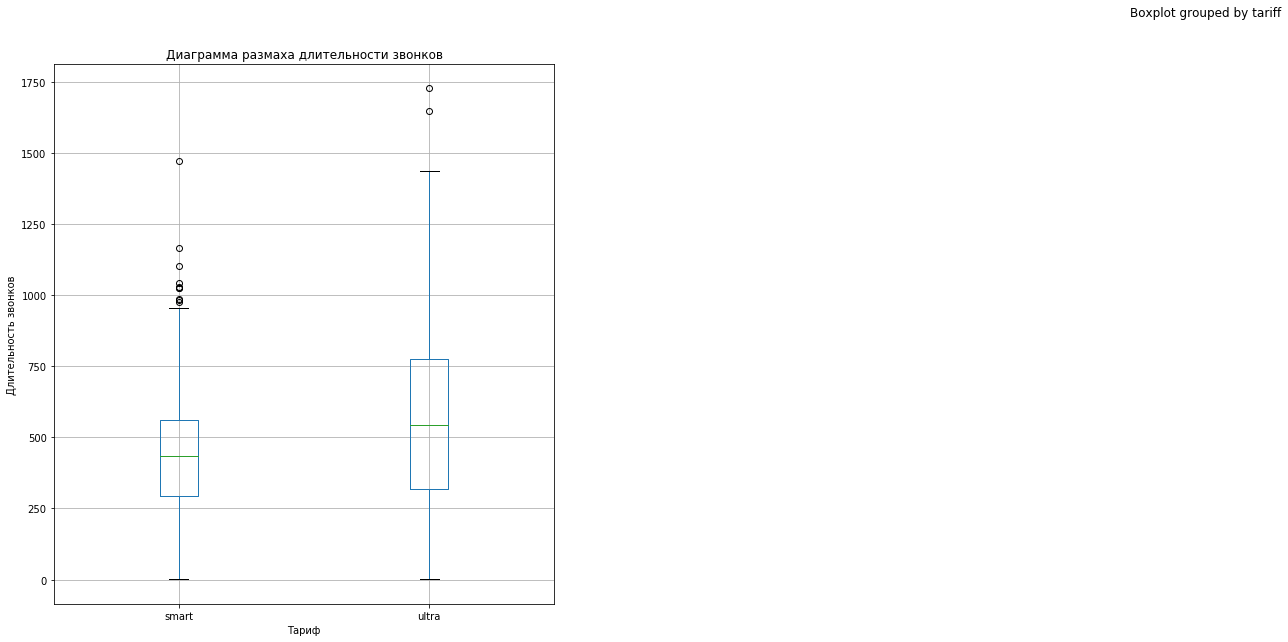

In [46]:
# построим диаграмму размаха
plt.subplots(figsize= (40, 10))
all_grouped.boxplot('calls_duration',  by = 'tariff', ax=plt.subplot(1, 4, 1))
plt.xlabel('Тариф')
plt.ylabel('Длительность звонков')
plt.title('Диаграмма размаха длительности звонков')

Мы видим, что по длительности звонков по тарифу Ultra практически все значения находятся внутри границ, лишь редкие отдельные значения выбиваются из этой тенденции.
По тарифу smart другая ситуация. Очень много данных находятся за пределами границ тарифа. 

Построим гистограмму, чтобы оченить распределение.

Text(0, 0.5, 'Частотность')

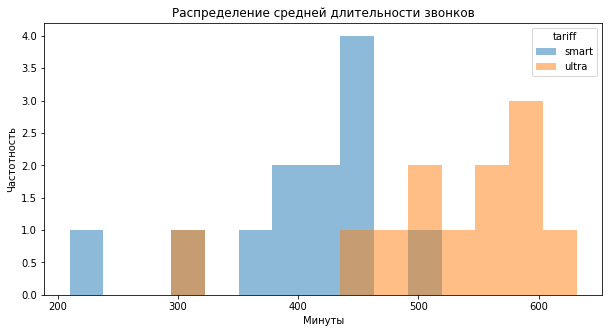

In [47]:
#строим гистограмму
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'calls_duration', aggfunc = 'mean')
.T
.plot(kind = 'hist', alpha=0.5, bins = 15, figsize = (10,5))
)
plt.title('Распределение средней длительности звонков')
plt.xlabel('Минуты')
plt.ylabel('Частотность')


Исходя из диаграммы видим, что по тарифу Ultra длительность разговоров выше, чем, по тарифу Smart

Text(0, 0.5, 'Частотность')

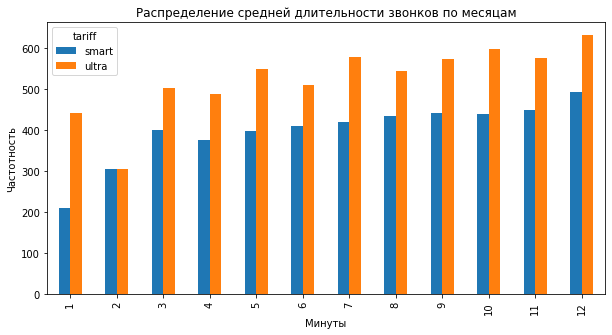

In [48]:
#построим столбчатую диаграмму
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'calls_duration', aggfunc = 'mean')
.T
.plot(kind = 'bar', figsize = (10,5))
)
plt.title('Распределение средней длительности звонков по месяцам')
plt.xlabel('Минуты')
plt.ylabel('Частотность')


<b>Вывод:</b>
В целом после изучения диаграмм, можно сказать, что разница между длительностью звонков по тарифам есть. По тарифу Ultra продолжительность разговоров была выше. Длительность разговоров увеличивалась в течение всех 12 месяцев изучаемого периода. В феврале знчения обоих тарифов сравнялись, и это был один из самых низких месяцев по длительности звонков.
Кроме того, есть интересное наблюдение: по длительности звонков по тарифу Ultra практически все значения находятся внутри границ, лишь редкие отдельные значения выбиваются из этой тенденции.По тарифу Smart, наоборот, большое количество звонков выходят за пределы обычных значений.

#### [3.1.2 Стандартное отклонение длительности разговора]<a id="step_3.1.2"></a>

In [49]:
#проанализируем стандартное отклонение
display(all_grouped.pivot_table(index = 'tariff', columns = 'month', values = 'calls_duration', aggfunc = 'std').T.describe())

tariff,smart,ultra
count,12.000000,12.000000
mean,186.871128,305.519697
std,11.147449,23.189200
min,158.869087,263.331982
25%,183.282323,294.996520
50%,189.955608,304.428200
75%,192.080232,320.314230
max,202.120647,342.199940


Если посмотреть на стандартное отклонение в тарифе smart и тарифе ultra,  то разница в значениях свидетельствует о том, что данные по тарифу ultra стабильнее.

Построим гистограмму

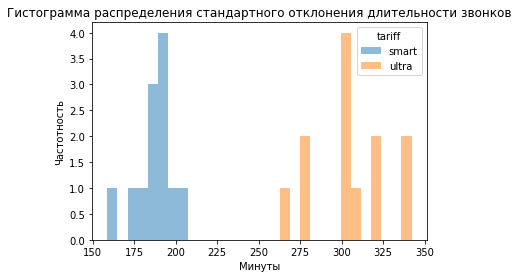

In [50]:
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'calls_duration', aggfunc = 'std')
.T
.plot(kind = 'hist', alpha = 0.5, bins = 30)
)
plt.title('Гистограмма распределения стандартного отклонения длительности звонков')
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.show()

Мы видим, что стандартное отклонение очень отличается по тарифам. Если распределение по тарифу Smart более цельное, то по тарифу Ultra  оно непостоянное, прерывистое, с большими разрывами.

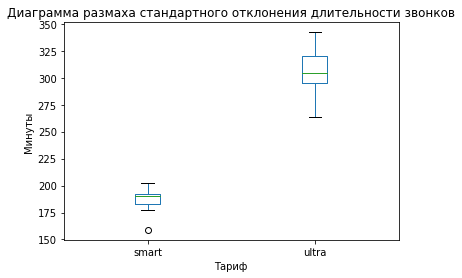

In [51]:
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'calls_duration', aggfunc = 'std')
.T
.plot(kind = 'box')
)
plt.title('Диаграмма размаха стандартного отклонения длительности звонков')
plt.xlabel('Тариф')
plt.ylabel('Минуты')
plt.show()

<b>Вывод:</b> распределение стандартного отклонения длительности звонков для пользователей тарифа Smart близко к нормальному, однако для тарифа Ultra - очень отличается. Это говорит о том, что пользователи тарифа Ultra менее стабильны в длительности звонков

#### [3.1.3 Дисперсия длительности звонков]<a id="step_3.1.3"></a>

[в начало](#toc)

In [52]:
#посмотрим подробнее на дисперсию длительности звонков
all_grouped.pivot_table(index = 'tariff', columns = 'month', values = 'calls_duration', aggfunc = 'var').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,35034.728477,93835.212479
std,4022.881782,14111.068047
min,25239.386809,69343.732946
25%,33593.979789,87088.867510
50%,36083.656595,92676.550717
75%,36897.682232,102601.599958
max,40852.755935,117100.798799


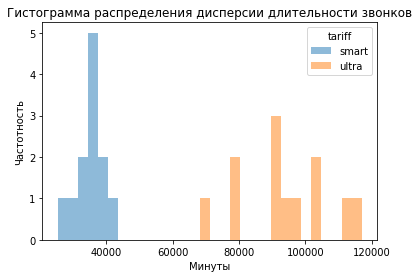

In [53]:
#построим график
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'calls_duration', aggfunc = 'var')
.T
.plot(kind = 'hist', alpha = 0.5, bins = 30)
)
plt.title('Гистограмма распределения дисперсии длительности звонков')
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.show()

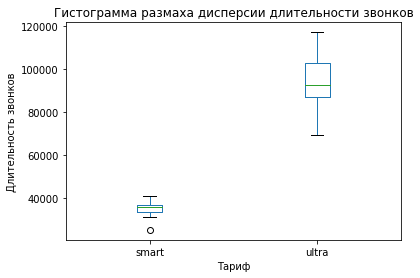

In [54]:
#построим диаграмму размаха
#построим график
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'calls_duration', aggfunc = 'var')
.T
.plot(kind = 'box')
)
plt.title('Гистограмма размаха дисперсии длительности звонков')
plt.xlabel('Тариф')
plt.ylabel('Длительность звонков')
plt.show()

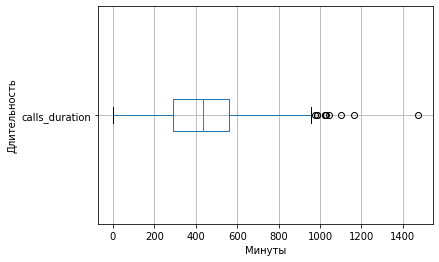

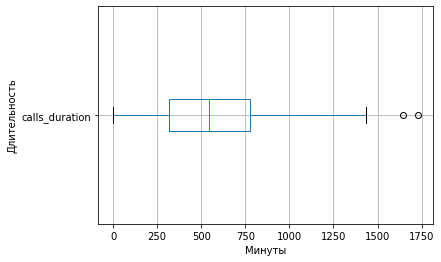

In [55]:
#построим диаграмму размаха
#построим график
smart_query[['calls_duration']].boxplot(vert=False)
plt.xlabel('Минуты')
plt.ylabel('Длительность')
plt.show()
ultra_query[['calls_duration']].boxplot(vert=False)
plt.xlabel('Минуты')
plt.ylabel('Длительность')
plt.show()

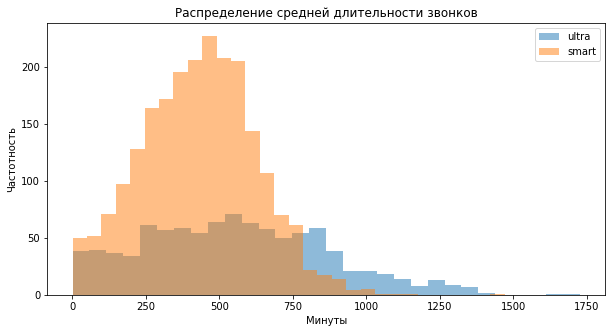

In [56]:
all_grouped[all_grouped['tariff'].isin(['ultra'])]['calls_duration'].plot(kind = 'hist', 
                                                                          alpha=0.5, bins = 30, 
                                                                          figsize = (10,5), label = 'ultra')

all_grouped[all_grouped['tariff'].isin(['smart'])]['calls_duration'].plot(kind = 'hist', 
                                                                          alpha=0.5, bins = 30, 
                                                                          figsize = (10,5), label = 'smart')
plt.title('Распределение средней длительности звонков')
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.legend();

<b>Вывод:</b>Из графиков мы видим, что дисперсия по тарифу Smart приближена к нормальному распределению, дисперсия по тарифу Ultra гораздо больше, чем по тарифу Smart

In [57]:
calls_ultra = all_grouped[all_grouped['tariff'].isin(['ultra'])]['calls_duration']
calls_smart = all_grouped[all_grouped['tariff'].isin(['smart'])]['calls_duration']
print('Среднее по тарифу Smart',calls_smart.mean() )
print('Среднее по тарифу Ultra', calls_ultra.mean() )


Среднее по тарифу Smart 430.60998650472334
Среднее по тарифу Ultra 560.1135646687698


In [58]:
ultra_calls_var = np.var((all_grouped[all_grouped['tariff'].isin(['ultra'])]['calls_duration']), ddof = 1)
smart_calls_var = np.var((all_grouped[all_grouped['tariff'].isin(['smart'])]['calls_duration']), ddof = 1)
print('Дисперсия по тарифу Smart', smart_calls_var )
print('Дисперсия по тарифу Ultra', ultra_calls_var)


Дисперсия по тарифу Smart 37577.96708294311
Дисперсия по тарифу Ultra 99062.63340527976


In [59]:
ultra_calls_std = np.std((all_grouped[all_grouped['tariff'].isin(['ultra'])]['calls_duration']), ddof = 1)
smart_calls_std = np.std((all_grouped[all_grouped['tariff'].isin(['smart'])]['calls_duration']), ddof = 1)
print('Стандартное отклонение по тарифу Smart', smart_calls_std )
print('Стандартное отклонение Ultra', ultra_calls_std )



Стандартное отклонение по тарифу Smart 193.85037292443653
Стандартное отклонение Ultra 314.74216972830277


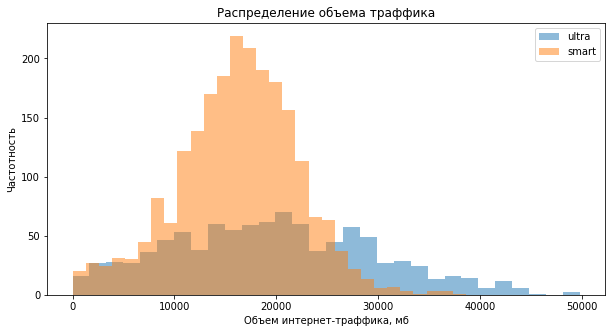

In [60]:
all_grouped[all_grouped['tariff'].isin(['ultra'])]['mb_used'].plot(kind = 'hist', 
                                                                          alpha=0.5, bins = 30, 
                                                                          figsize = (10,5), label = 'ultra')

all_grouped[all_grouped['tariff'].isin(['smart'])]['mb_used'].plot(kind = 'hist', 
                                                                          alpha=0.5, bins = 30, 
                                                                          figsize = (10,5), label = 'smart')
plt.title('Распределение объема траффика')
plt.xlabel('Объем интернет-траффика, мб')
plt.ylabel('Частотность')
plt.legend();

Тут мы видим, что наибольшее количество пользователей тарифа smart использует траффик около 15 000 мб, большая часть пользователей тарифа Ultra использзует около 20 000 мб.

Рассчитаем дисперсию, ст.отклонение и среднее для объема интернет траффика 

In [61]:
mb_ultra = all_grouped[all_grouped['tariff'].isin(['ultra'])]['mb_used']
mb_smart = all_grouped[all_grouped['tariff'].isin(['smart'])]['mb_used']
print('Среднее объема интернет-траффика по тарифу Smart', mb_smart.mean() )
print('Среднее объема интернет-траффика по тарифу Ultra', mb_ultra.mean() )
print()
ultra_mb_var = np.var((all_grouped[all_grouped['tariff'].isin(['ultra'])]['mb_used']), ddof = 1)
smart_mb_var = np.var((all_grouped[all_grouped['tariff'].isin(['smart'])]['mb_used']), ddof = 1)
print('Дисперсия объема интернет-траффика по тарифу Smart', smart_mb_var )
print('Дисперсия объема интернет-траффика по тарифу Ultra', ultra_mb_var )
print()
ultra_mb_std = np.std((all_grouped[all_grouped['tariff'].isin(['ultra'])]['mb_used']), ddof = 1)
smart_mb_std = np.std((all_grouped[all_grouped['tariff'].isin(['smart'])]['mb_used']), ddof = 1)
print('Стандартное отклонение объема интернет-траффика по тарифу Smart', smart_mb_std)
print('Стандартное отклонение объема интернет-траффика Ultra', ultra_mb_std )

Среднее объема интернет-траффика по тарифу Smart 16236.47262118492
Среднее объема интернет-траффика по тарифу Ultra 19686.76717948718

Дисперсия объема интернет-траффика по тарифу Smart 34443100.68133359
Дисперсия объема интернет-траффика по тарифу Ultra 99043439.60795662

Стандартное отклонение объема интернет-траффика по тарифу Smart 5868.824471845583
Стандартное отклонение объема интернет-траффика Ultra 9952.057054094726


<div class="alert alert-block alert-info">
Построим график по столбцу messages
</div>

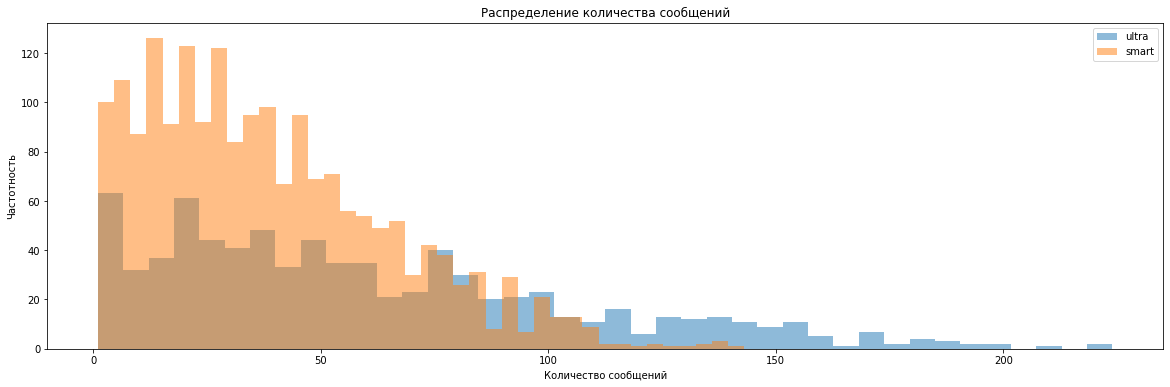

In [62]:
all_grouped[all_grouped['tariff'].isin(['ultra'])]['messages'].plot(kind = 'hist', 
                                                                          alpha=0.5, bins = 40, 
                                                                          figsize = (20,6), label = 'ultra')

all_grouped[all_grouped['tariff'].isin(['smart'])]['messages'].plot(kind = 'hist', 
                                                                          alpha=0.5, bins = 40, 
                                                                          figsize = (20,6), label = 'smart')
plt.title('Распределение количества сообщений')
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')
plt.legend();

<div class="alert alert-block alert-info">
Как видно из графика, пользователи тарифа Ultra отправляют большее количество сообщений. Видны пики на некоторых определенных количествах </div>

<div class="alert alert-block alert-info">
Рассчитаем дисперсию, ст.отклонение и среднее для столбца 'messeges' </div>

In [63]:
sms_ultra = all_grouped[all_grouped['tariff'].isin(['ultra'])]['messages']
sms_smart = all_grouped[all_grouped['tariff'].isin(['smart'])]['messages']
print('Среднее количества сообщений по тарифу Smart', sms_smart.mean() )
print('Среднее количества сообщений по тарифу Ultra', sms_ultra.mean() )
print()
ultra_sms_var = np.var((all_grouped[all_grouped['tariff'].isin(['ultra'])]['messages']), ddof = 1)
smart_sms_var = np.var((all_grouped[all_grouped['tariff'].isin(['smart'])]['messages']), ddof = 1)
print('Дисперсия количества сообщений по тарифу Smart', smart_sms_var )
print('Дисперсия количества сообщенийа по тарифу Ultra', ultra_sms_var )
print()
ultra_sms_std = np.std((all_grouped[all_grouped['tariff'].isin(['ultra'])]['messages']), ddof = 1)
smart_sms_std = np.std((all_grouped[all_grouped['tariff'].isin(['smart'])]['messages']), ddof = 1)
print('Стандартное отклонение количества сообщений по тарифу Smart', smart_sms_std)
print('Стандартное отклонение количества сообщений Ultra', ultra_sms_std )

Среднее количества сообщений по тарифу Smart 38.71644120707596
Среднее количества сообщений по тарифу Ultra 61.161006289308176

Дисперсия количества сообщений по тарифу Smart 717.5942011753547
Дисперсия количества сообщенийа по тарифу Ultra 2109.6591828651995

Стандартное отклонение количества сообщений по тарифу Smart 26.787948804926344
Стандартное отклонение количества сообщений Ultra 45.93102636416042


### [3.2 Анализ количества сообщений] <a id="step_3.2"></a>

[в начало](#toc)

#### [3.2.1  Среднее количество сообщений по тарифам] <a id="step_3.2.1"></a>

In [64]:
#построим сводную таблицу и посмотрим ее описание
display(all_grouped.pivot_table(index = 'tariff', columns = 'month', values = 'messages', aggfunc = 'mean').T.describe())

tariff,smart,ultra
count,12.000000,12.000000
mean,36.262730,55.169629
std,6.229501,12.042615
min,20.000000,32.937500
25%,35.786119,46.978205
50%,38.869253,55.605580
75%,39.116941,64.010876
max,42.264808,72.008547


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Диаграмма размаха среднего количества сообщений')

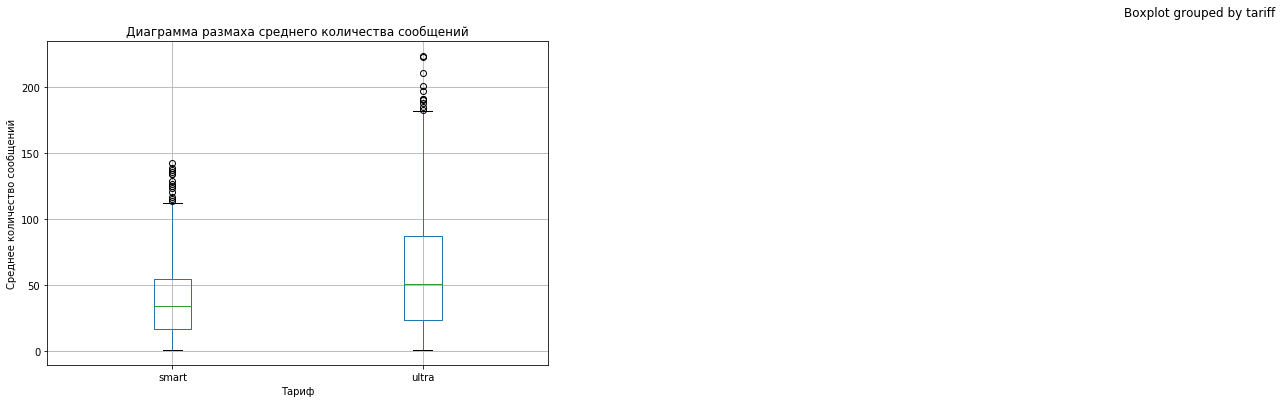

In [65]:
# построим диаграмму размаха
plt.subplots(figsize= (40, 6))
all_grouped.boxplot('messages',  by = 'tariff', ax=plt.subplot(1, 4, 1))
plt.xlabel('Тариф')
plt.ylabel('Среднее количество сообщений')
plt.title('Диаграмма размаха среднего количества сообщений')

Text(0, 0.5, 'Частотность')

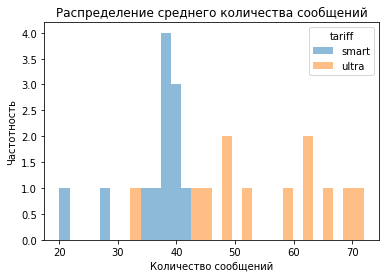

In [66]:
#строим гистограмму
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'messages', aggfunc = 'mean')
.T
.plot(kind = 'hist', alpha=0.5, bins = 30)
)
plt.title('Распределение среднего количества сообщений')
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')

Мы видим, что в тарифе Ultra больший разброс по количеству сообщений и общее количество сообщений больше.
Тем не менее по тарифу Smart так же есть разброс по сообщениям, но не такой сильный.

Text(0, 0.5, 'Месяц')

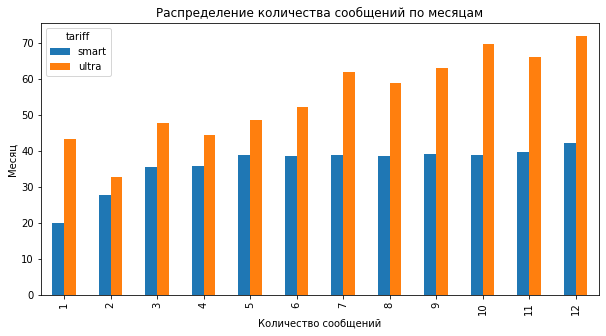

In [67]:
#построим столбчатую диаграмму
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'messages', aggfunc = 'mean')
.T
.plot(kind = 'bar', figsize = (10,5))
)
plt.title('Распределение количества сообщений по месяцам')
plt.xlabel('Количество сообщений')
plt.ylabel('Месяц')

<b>Вывод: </b> В целом пользователи тарифа Ultra отправляют больше сообщений, чем, пользователи тарфа Smart.
Здесь мы видим похожую картину, что и по звонкам. В целом, количество сооьщений по обоим тарифм растет в течение 12 месяцев.
Самое низкое количество сообщений - в феврале.

#### [3.2.2  Стандартное отклонение количества сообщений по тарифам] <a id="step_3.2.2"></a>

[в начало](#toc)

In [68]:
#проанализируем стандартное отклонение
display(all_grouped.pivot_table(index = 'tariff', columns = 'month', values = 'messages', aggfunc = 'std').T.describe())

tariff,smart,ultra
count,12.000000,12.000000
mean,25.125986,41.572738
std,3.621369,7.559188
min,15.878707,26.709471
25%,24.644676,39.000073
50%,26.588090,43.831392
75%,27.071223,46.960619
max,28.852160,49.260598


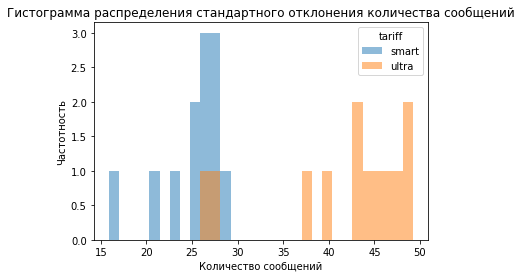

In [69]:
#построим гистограмму
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'messages', aggfunc = 'std')
.T
.plot(kind = 'hist', alpha = 0.5, bins = 30)
)
plt.title('Гистограмма распределения стандартного отклонения количества сообщений')
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')
plt.show()

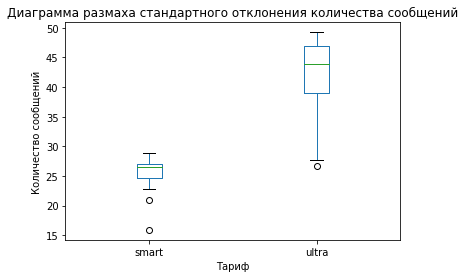

In [70]:
#построим диаграмму размаха
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'messages', aggfunc = 'std')
.T
.plot(kind = 'box')
)
plt.title('Диаграмма размаха стандартного отклонения количества сообщений')
plt.xlabel('Тариф')
plt.ylabel('Количество сообщений')
plt.show()

<b> Вывод: </b> Распределение стандартного отклонения далеко от нормального распределения по обоим тарифам. Но больший размах наблюдается у пользователей тарифа Ultra.

#### [3.2.3  Анализ дисперсии количества сообщений по тарифам] <a id="step_3.2.3"></a>

[в начало](#toc)

In [71]:
#посмотрим подробнее на дисперсию длительности звонков
all_grouped.pivot_table(index = 'tariff', columns = 'month', values = 'messages', aggfunc = 'var').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,643.336613,1780.672066
std,162.969953,572.265368
min,252.133333,713.395833
25%,608.548252,1521.729261
50%,706.933460,1921.218134
75%,732.852605,2205.372188
max,832.447114,2426.606511


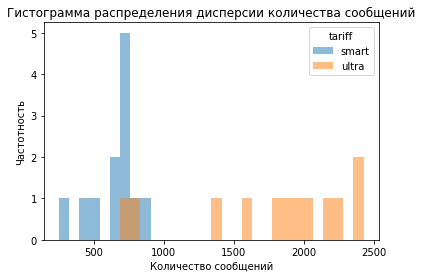

In [72]:
#построим график
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'messages', aggfunc = 'var')
.T
.plot(kind = 'hist', alpha = 0.5, bins = 30)
)
plt.title('Гистограмма распределения дисперсии количества сообщений')
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')
plt.show()

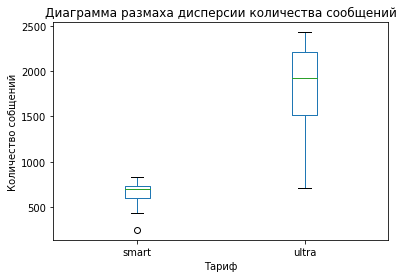

In [73]:
#построим диаграмму размаха
#построим график
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'messages', aggfunc = 'var')
.T
.plot(kind = 'box')
)
plt.title('Диаграмма размаха дисперсии количества сообщений')
plt.xlabel('Тариф')
plt.ylabel('Количество собщений')
plt.show()

<b>Вывод:</b> мы видим, что распределение дисперсии так же не похоже на нормальное  и в тарифе Ultra более нестабильна, чем в тарифе Smart

### [3.3 Анализ интернет-траффика] <a id="step_3.3"></a>

[в начало](#toc)

#### [3.3.1  Среднее количество интернет-траффика] <a id="step_3.3.1"></a>

In [74]:
#построим сводную таблицу и посмотрим ее описание
display(all_grouped.pivot_table(index = 'tariff', columns = 'month', values = 'mb_used', aggfunc = 'mean').T.describe())

tariff,smart,ultra
count,12.000000,12.000000
mean,15083.613790,18443.306354
std,2678.569026,2867.635425
min,8524.441176,12858.500000
25%,14712.763393,17374.929730
50%,15819.983437,19532.836523
75%,16722.080259,20022.751140
max,18136.833828,21971.659420


По использованию интернет-траффика мы видим, что средние значения очень близки. При этом минимумы отличаются существенно. Возможно, тариф smart покупают люди, которые не планируют много пользоваться интернетом.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Диаграмма размаха среднего объема интернет-траффика')

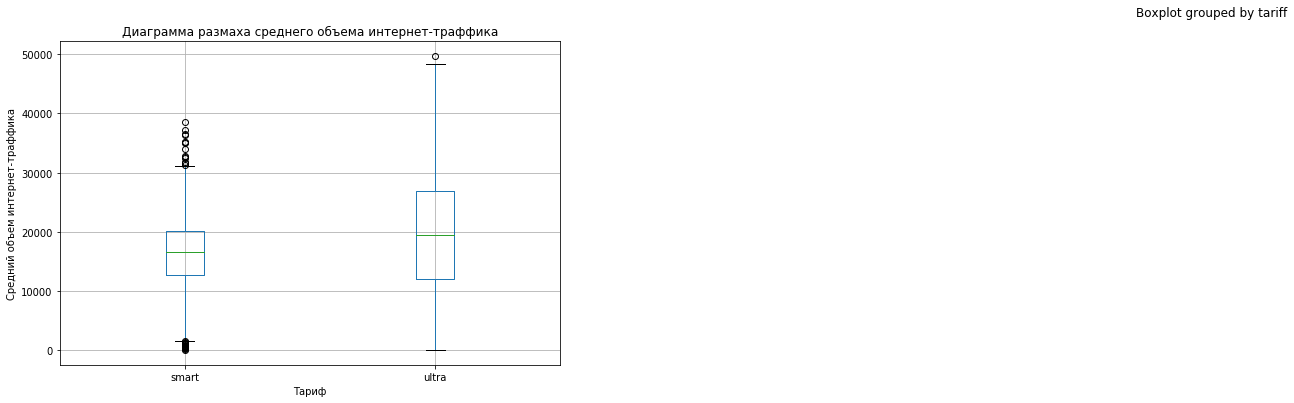

In [75]:
# построим диаграмму размаха
plt.subplots(figsize= (40, 6))
all_grouped.boxplot('mb_used',  by = 'tariff', ax=plt.subplot(1, 4, 1))
plt.xlabel('Тариф')
plt.ylabel('Средний объем интернет-траффика')
plt.title('Диаграмма размаха среднего объема интернет-траффика')

Здесь мы так же видим, что пользователи тарифа Ultra больше пользуются интернетом, но пересечение по данным есть.

Text(0, 0.5, 'Частотность')

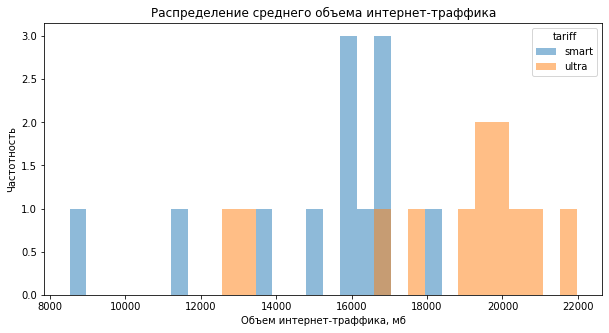

In [76]:
#строим гистограмму
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'mb_used', aggfunc = 'mean')
.T
.plot(kind = 'hist', alpha=0.5, bins = 30, figsize = (10,5))
)
plt.title('Распределение среднего объема интернет-траффика')
plt.xlabel('Объем интернет-траффика, мб')
plt.ylabel('Частотность')

Гистограмма так же показывает, что пересечение по объему траффика есть, но объем по тарифу Ultra все же больше

Text(0, 0.5, 'Месяц')

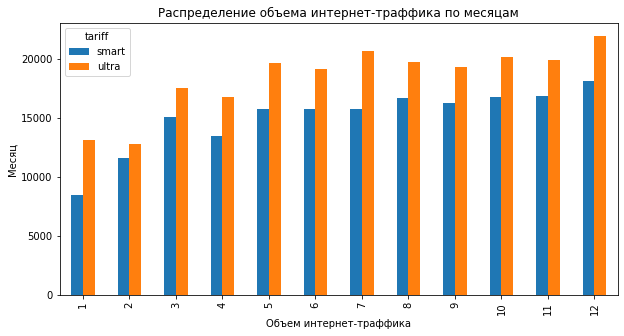

In [77]:
#построим столбчатую диаграмму
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'mb_used', aggfunc = 'mean')
.T
.plot(kind = 'bar', figsize = (10,5))
)
plt.title('Распределение объема интернет-траффика по месяцам')
plt.xlabel('Объем интернет-траффика')
plt.ylabel('Месяц')

В целом по графику видно похожее распределение данных по месяцам

<b>Вывод:</b> В целом по интернет-траффику поведение пользователей похоже на обоих тарифов. Использование траффика растет от месяца к месяцу. Меньше всего объем траффика был в январе - феврале, самый высокий - в декабре. Средние значения похожи по обоим тарифам, но минимальные и максимальные существенно отличаются.

#### [3.3.2  Стандартное отклонение объема интернет-траффика] <a id="step_3.3.2"></a>

[в начало](#toc)

In [78]:
#проанализируем стандартное отклонение
display(all_grouped.pivot_table(index = 'tariff', columns = 'month', values = 'mb_used', aggfunc = 'std').T.describe())

tariff,smart,ultra
count,12.000000,12.000000
mean,5786.281418,9696.175911
std,355.114208,1020.956774
min,5202.129029,6872.147046
25%,5561.565536,9600.929287
50%,5816.713303,9820.787991
75%,5924.540976,10282.113177
max,6451.837940,10961.936316


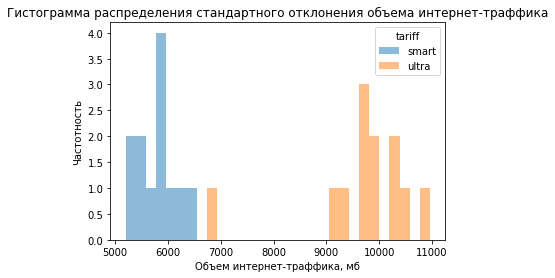

In [79]:
#построим гистограмму
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'mb_used', aggfunc = 'std')
.T
.plot(kind = 'hist', alpha = 0.5, bins = 30)
)
plt.title('Гистограмма распределения стандартного отклонения объема интернет-траффика')
plt.xlabel('Объем интернет-траффика, мб')
plt.ylabel('Частотность')
plt.show()

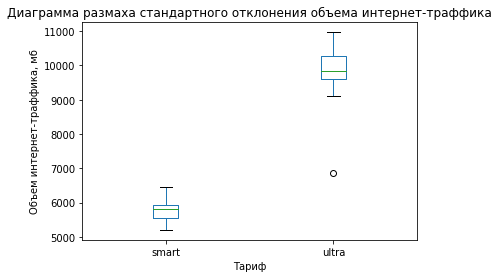

In [80]:
#построим диаграмму размаха
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'mb_used', aggfunc = 'std')
.T
.plot(kind = 'box')
)
plt.title('Диаграмма размаха стандартного отклонения объема интернет-траффика')
plt.xlabel('Тариф')
plt.ylabel('Объем интернет-траффика, мб')
plt.show()

По графикам отчетливо видно, что стандартное отклонение сильно различается. Разброс значений по объему траффика среди пользователей тарифа Ultra существенно выше.

Text(0, 0.5, 'Месяц')

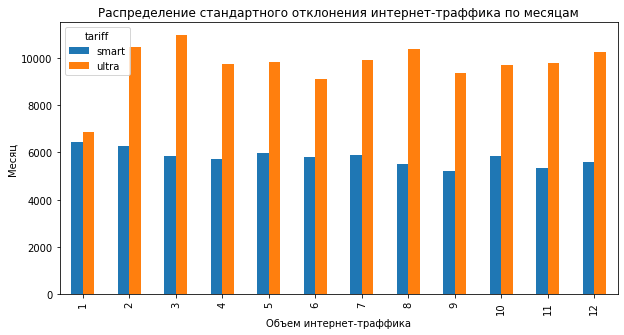

In [81]:
#построим столбчатую диаграмму
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'mb_used', aggfunc = 'std')
.T
.plot(kind = 'bar', figsize = (10,5))
)
plt.title('Распределение стандартного отклонения интернет-траффика по месяцам')
plt.xlabel('Объем интернет-траффика')
plt.ylabel('Месяц')

<b>Вывод:</b> По графикам отчетливо видно, что стандартное отклонение между тарифами сильно различается. Разброс значений по объему траффика среди пользователей тарифа Ultra существенно выше.
Стандартное отклонение внутри каждого тарифа от месяца к месяцу меняется не сильно, разброс значений к концу года по тарифу Ultra немного выравнивается. По тарифу Smart разброс в течение года более ровный.

#### [3.3.3  Анализ дисперсии объема интернет-траффика]<a id="step_3.3.3"></a>

[в начало](#toc)

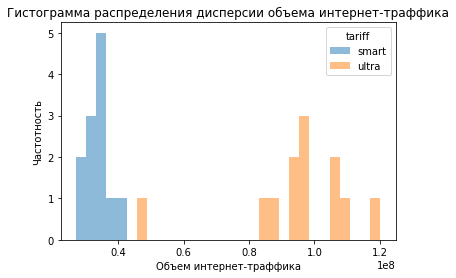

In [82]:
#построим график
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'mb_used', aggfunc = 'var')
.T
.plot(kind = 'hist', alpha = 0.5, bins = 30)
)
plt.title('Гистограмма распределения дисперсии объема интернет-траффика')
plt.xlabel('Объем интернет-траффика')
plt.ylabel('Частотность')
plt.show()

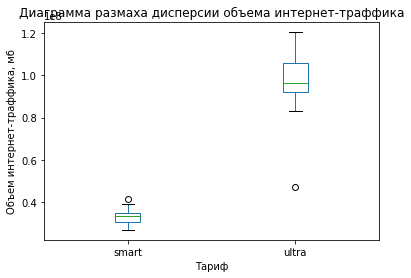

In [83]:
#построим диаграмму размаха
(all_grouped
.pivot_table(index = 'tariff', columns = 'month', values = 'mb_used', aggfunc = 'var')
.T
.plot(kind = 'box')
)
plt.title('Диаграмма размаха дисперсии объема интернет-траффика')
plt.xlabel('Тариф')
plt.ylabel('Объем интернет-траффика, мб')
plt.show()

<b> Вывод: </b> Из графиков видно, что дисперсия в тарифах сильно отличается. Дисперсия по тарифу Smart приближена к нормальному распределению, дисперсия по тарифу Ultra далека от нормального распределения.

### [Шаг4. Исследование выручки. Проверка гипотез]<a id="step_4"></a>

[в начало](#toc)

### [4.1 Исследование выручки] <a id="step_4.1"></a>

In [84]:
#посмотрим на среднюю выручку по тарифам, мы ее считали ранее в пункте 3
print('Средняя выручка по тарифу Smart:',mean_smart_total_cost)
print('Средняя выручка по тарифу Ultra:', mean_ultra_total_cost)

Средняя выручка по тарифу Smart: 1250.0
Средняя выручка по тарифу Ultra: 2061.0


In [85]:
#посмотрим описание по тарифам:
print('Данные по выручке тарифа Smart:')
display(smart_query['total_cost'].describe())

print('Данные по выручке тарифа Ultra:')
display(ultra_query['total_cost'].describe())


Данные по выручке тарифа Smart:


count    2229.000000
mean     1250.325240
std       797.031332
min       550.000000
25%       553.000000
50%       986.492188
75%      1701.562500
max      6765.015625
Name: total_cost, dtype: float64

Данные по выручке тарифа Ultra:


count     985.000000
mean     2060.529971
std       356.305046
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4743.310547
Name: total_cost, dtype: float64

Мы видим, что по тарифу Smart очень высокий разброс от минимальной цены (стоимости тарифа) - 550 руб.  до максимальной - 6765 руб.) по тарифу Ultra разборс не такой сильный - от 1950 руб. до 4743 руб.

Построим диаграммы

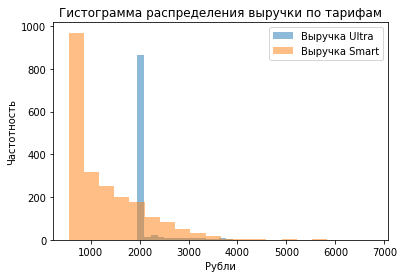

In [86]:
#строим гистограмму
ax = all_grouped[all_grouped['tariff'] == 'ultra'].plot(kind = 'hist', y = 'total_cost', label = 'Выручка Ultra', alpha =0.5, bins = 20)
all_grouped[all_grouped['tariff'] == 'smart'].plot(kind = 'hist', y = 'total_cost', label = 'Выручка Smart', ax=ax, alpha =0.5, bins = 20)
plt.title('Гистограмма распределения выручки по тарифам')
plt.xlabel('Рубли')
plt.ylabel('Частотность')
plt.show()

Таким образом, мы видим, что в тарифе Ultra лишь малая часть пользователей выходит за рамки своего тарифа.
Однако, среди пользователей тарифа Smart, достаточно большое количество превышают лимит и переплачивают по стоимости. При этом мы помним, что стоимость превышения лимита по всем услугам по тарифу Smart больше, чем у тарифа Ultra.
Можно сделать вывод, что достаточно большому количеству пользователей тарифа Smart было бы выгодней переключиться на тариф Ultra и не переплачивать.

### [4.2 Проверка гипотез] <a id="step_4.2"></a>

[в начало](#toc)

<b> Наши гипотезы: </b>

#### H0 - Средняя выручка пользователей тарифов Ультра и Смарт равны

#### H1 - Средняя выручка пользователей тарифов Ультра и Смарт не равны

Для проверки гипотез будем использовать критерий p-value. Если p-value меньше порогового значения alpha, то гипотезу отвергаем. Иначе - не отвергаем. Alpha = 0.05

In [87]:
#задали alpha
alpha = 0.05

#используем т-тест, сравнивая выборки
results = st.ttest_ind(smart_query['total_cost'], ultra_query['total_cost'])
print('p-значение:', results.pvalue)

#функция для вывода нужного нам результата
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средняя выручка тарифов различается.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 1.7881542264676596e-180
Отвергаем нулевую гипотезу. Средняя выручка тарифов различается.


Проверка дисперсии выборок, [стат.тестом Левене](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) и  [тестом Барлетта](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html). 


In [88]:
from scipy.stats import levene
stat, p = levene(smart_query['total_cost'], ultra_query['total_cost'])
p

5.212050107656611e-119

In [89]:
from scipy.stats import bartlett
stat, p = bartlett(smart_query['total_cost'], ultra_query['total_cost'])
p

4.154473791793454e-150

In [90]:
[np.var(x, ddof=1) for x in [smart_query['total_cost'], ultra_query['total_cost']]]

[635258.9445427976, 126953.2854599396]

Тест Барлетта - используется при нормальном распределении, Левене - если распределение ненормальное.

При этом p-value достаточно мало, что позволяет утверждать, что ошибочный результат маловероятен. Это говорит нам о том, что мы можем принять альтернативную гипотезу - средняя выручка тарифов различается.

Данный вывод совпадает с тем, что мы ранее описали при исследовании выручки. Его можно сччитать корректным.

Теперь создадим 2 новых датафрейма: для москвичей и не-москвичей. На них проверим нулевую гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

#### H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, т.е. средние значения равны

#### H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из  других регионов, т.е. средние значения не равны

Для оценки гипотез будетм так же использовать критерий pvalue

In [91]:
#отделим срез данных по городу Москва
mow_query = all_grouped.query('city == "Москва"')
other_city_query = all_grouped.query('city != "Москва"')

results_city = st.ttest_ind(mow_query['total_cost'], other_city_query['total_cost'])


print('p-значение:', results_city.pvalue)
if results_city.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 0.5205321893722812
Не можем отвергнуть нулевую гипотезу.


Полученное значение p-value говорит о том, что в среднем выручка между Москвой и остальными регионами отличается, но с вероятностью 52% такое значение можно получить случайно. Это слишком высокая вероятность, чтобы делать выводы о значимом различии между средними значениями выручки. Поэтому принимаем гипотезу, что средняя выручка по Москве равна средней выручке по другим регионам.

### [Шаг 5. Общий вывод] <a id="step_5"></a>

[в начало](#toc)

В данной работе мы рассмотрели 5 таблиц от 500 до 202607 строк, в которых содержится информация о пользователях сотового оператора. Провели обработку данных, проверив таблицы на пропуски и дубликаты, заменили формат данных, заменили похожие названия столбцов. <p>
Далее мы расмотрели имеющиеся данные, посмотрели динамку роста услуг и выяснили, что по всем тарифам происходил рост объема услуг в течение всего исследуемого периода, так же росла и выручка, что выглядит довольно гармонично. <p>
После чего мы проанализировали данные более подробно, выяяснив распределение средних значений по всем видам предоставляемых услуг. Как показал наш анализ, активность пользователей отличается в зависимости от тарифов. Пользователи тарифа Ultra не так ограничены лимитами, поэтому разброс значений в этом тарифе наблюдается почти по всем критериям. 
Так же активность различается, в зависимости от типа услуг: например, по количеству звонков и сообщений результаты очень разные между тарифами, а вот сравнивая объем интернет-траффика, мы заметили много пересечений.
Тем не менее, большая часть клиентов этого тарифа Ultra уклыдвается в абонентскую плату. Менее четверти из них доплачивают за услуги.
Из всех видов услуг, по которым клиенты превышают лимит выигрывает по интернет-траффик.
Именно этим обусловлен больший процент выручки у тарифа Smart. Кроме того, по тарифу Smart клиенты чаще всего выпадают из лимита по звонкам, в то время как в тариф Ultra включен большой лимит по минутам и пользователям его хватает. <p>
Таким образом, можно озвучить основной вывод: тариф Smart для сотового оператора будет выгодней, чем тариф Ultra, с сохранением текущих лимитов и сохранением текущей стоимости доплат за превышение лимитов, ходящих в тариф. 
